In [1]:
import cv2
import numpy as np
import sympy
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from plyfile import PlyData,PlyElement
%matplotlib inline 

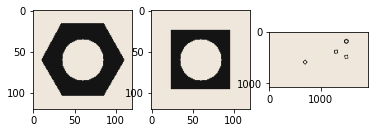

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

Automatically Selected Threshold value for hexnut_template = 20.0
Automatically Selected Threshold value for squarenut_template = 20.0
Automatically Selected Threshold value for conveyor_f100 = 20.0


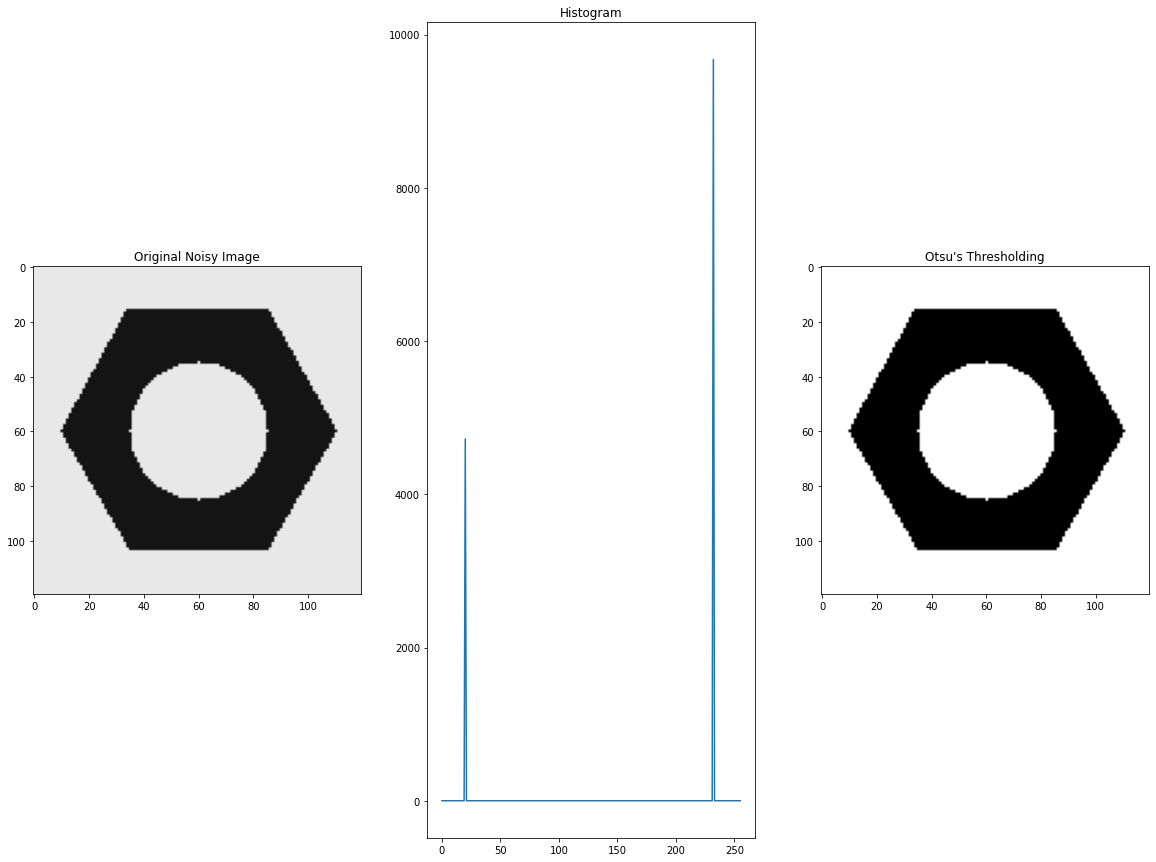

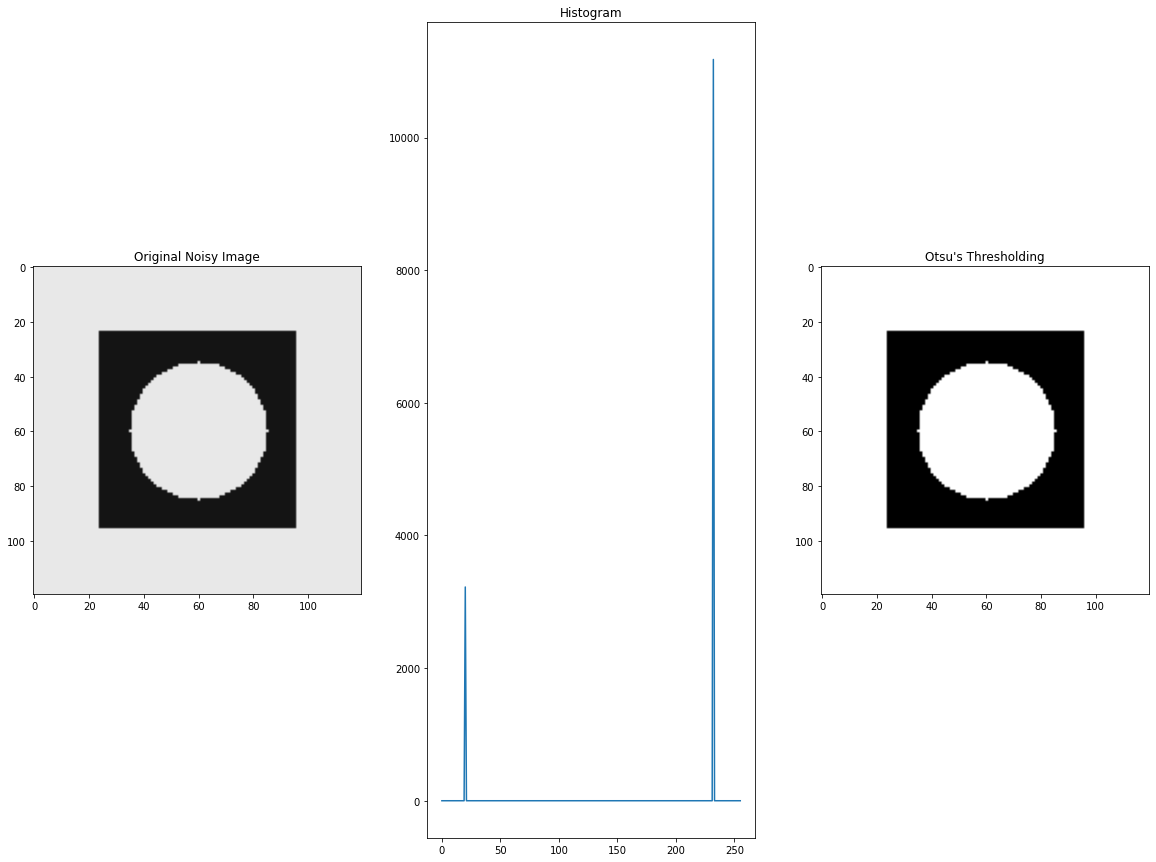

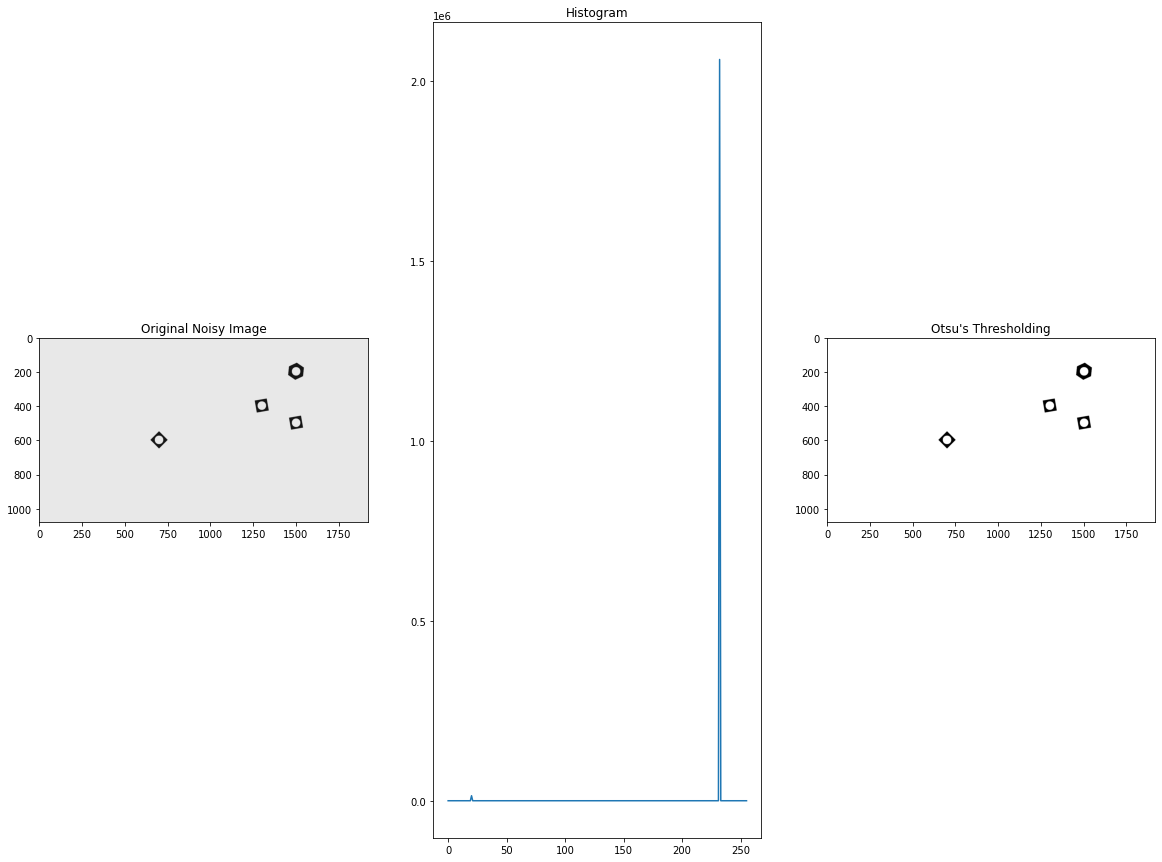

In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img1 = cv.imread('hexnut_template.png',cv.IMREAD_GRAYSCALE)
hist_f1 = cv2.calcHist([img1],[0],None,[256],[0,256])

img2 = cv.imread('squarenut_template.png',cv.IMREAD_GRAYSCALE)
hist_f2 = cv2.calcHist([img2],[0],None,[256],[0,256])

img3 = cv.imread('conveyor_f100.png',cv.IMREAD_GRAYSCALE)
hist_f3 = cv2.calcHist([img3],[0],None,[256],[0,256])

# Otsu's thresholding
ret1,th1 = cv.threshold(img1,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
print("Automatically Selected Threshold value for hexnut_template =",ret1)

ret2,th2 = cv.threshold(img2,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
print("Automatically Selected Threshold value for squarenut_template =",ret2)

ret3,th3 = cv.threshold(img3,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
print("Automatically Selected Threshold value for conveyor_f100 =",ret3)

fig, ax = plt.subplots(1,3,figsize= (20,15))
ax[0].imshow(img1,cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Original Noisy Image')
ax[1].plot(hist_f1)
ax[1].set_title('Histogram')
ax[2].imshow(th1,cmap='gray',vmin=0,vmax=255)
ax[2].set_title("Otsu's Thresholding")

fig, ax = plt.subplots(1,3,figsize= (20,15))
ax[0].imshow(img2,cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Original Noisy Image')
ax[1].plot(hist_f2)
ax[1].set_title('Histogram')
ax[2].imshow(th2,cmap='gray',vmin=0,vmax=255)
ax[2].set_title("Otsu's Thresholding")

fig, ax = plt.subplots(1,3,figsize= (20,15))
ax[0].imshow(img3,cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Original Noisy Image')
ax[1].plot(hist_f3)
ax[1].set_title('Histogram')
ax[2].imshow(th3,cmap='gray',vmin=0,vmax=255)
ax[2].set_title("Otsu's Thresholding")
plt.show()

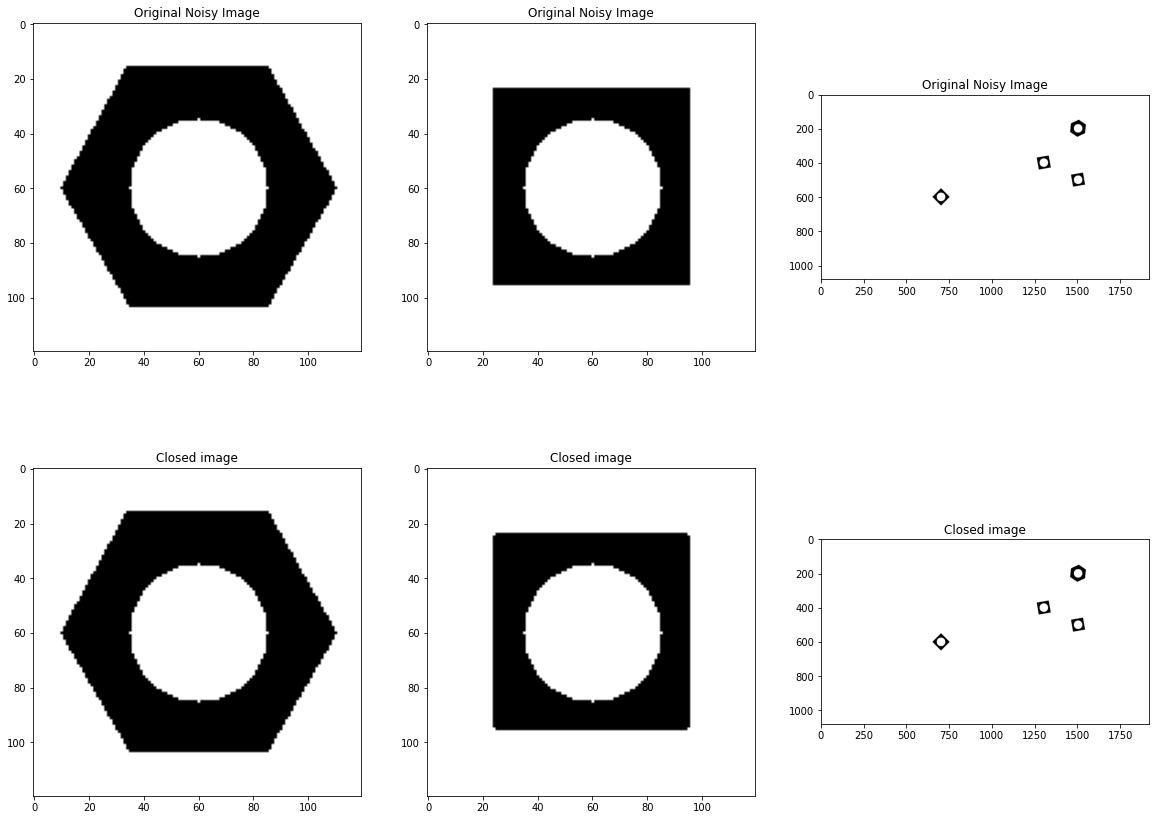

In [4]:
kernel = np.array([[0,1,0],
                   [1,1,1],
                   [0,1,0]])
kernel = kernel.astype('uint8')

closing1 = cv.morphologyEx(th1, cv.MORPH_CLOSE, kernel)
closing2 = cv.morphologyEx(th2, cv.MORPH_CLOSE, kernel)
closing3 = cv.morphologyEx(th3, cv.MORPH_CLOSE, kernel)

fig, ax = plt.subplots(2,3,figsize= (20,15))
ax[0][0].imshow(th1,cmap='gray',vmin=0,vmax=255)
ax[0][0].set_title('Original Noisy Image')
ax[1][0].imshow(closing1,cmap='gray',vmin=0,vmax=255)
ax[1][0].set_title('Closed image')

ax[0][1].imshow(th2,cmap='gray',vmin=0,vmax=255)
ax[0][1].set_title('Original Noisy Image')
ax[1][1].imshow(closing2,cmap='gray',vmin=0,vmax=255)
ax[1][1].set_title('Closed image')

ax[0][2].imshow(th3,cmap='gray',vmin=0,vmax=255)
ax[0][2].set_title('Original Noisy Image')
ax[1][2].imshow(closing3,cmap='gray',vmin=0,vmax=255)
ax[1][2].set_title('Closed image')
plt.show()

---- hexnut_template ---
Number of connected components = 2
--Background--
     left most coordinate = 0 | top most coordinate = 0 | horizontal size = 120 | vertical size = 120
     Area = 9676
     Centroid Coordinates are = (59.33712277800744, 59.63528317486565)
--Component1--
     left most coordinate = 10 | top most coordinate = 16 | horizontal size = 101 | vertical size = 88
     Area = 4724
     Centroid Coordinates are = (59.83361558001693, 59.22290431837426)


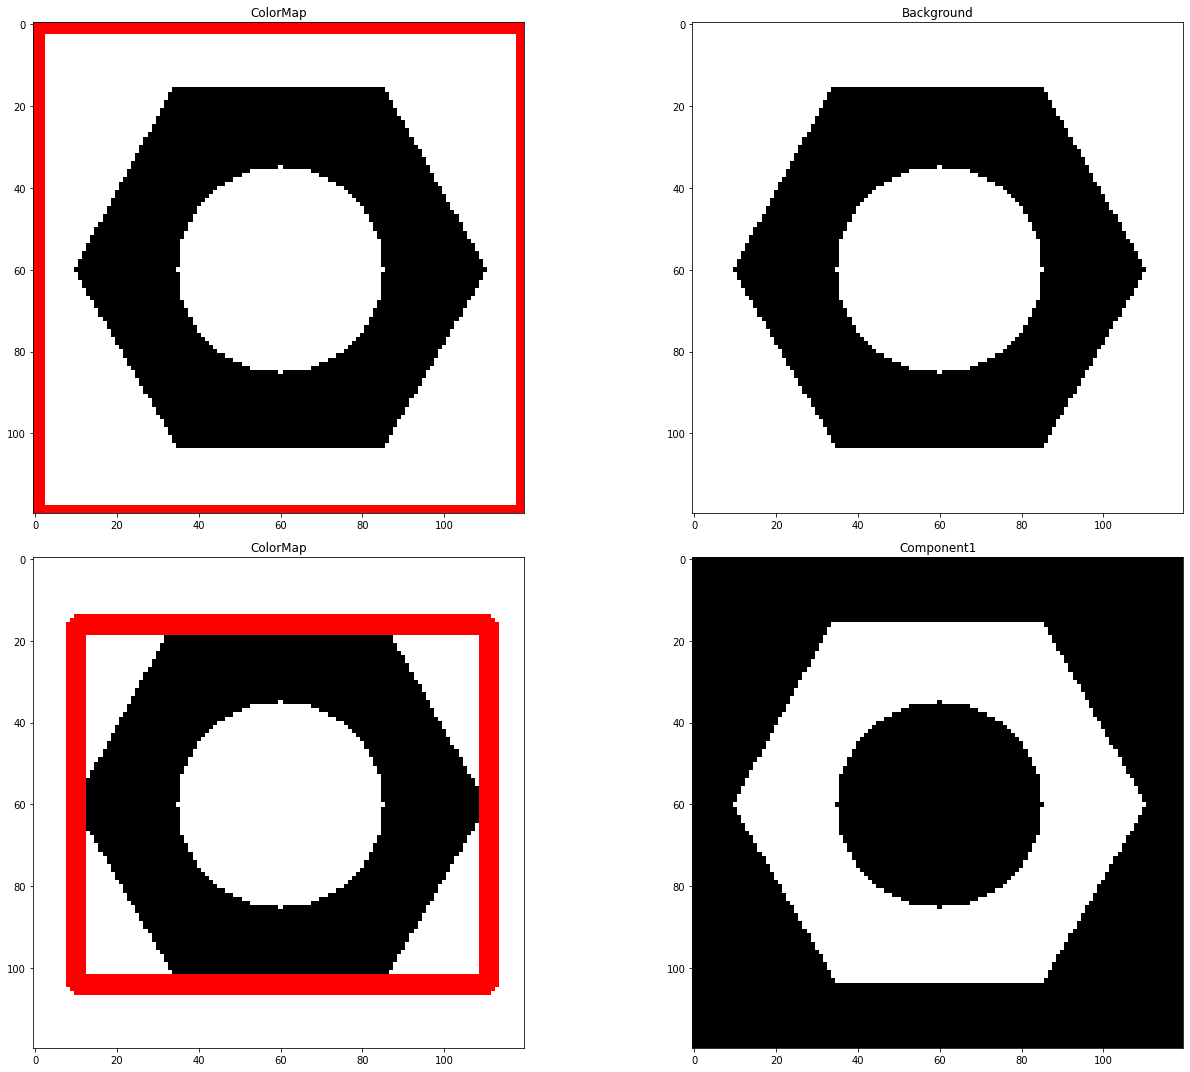

---- squarenut_template ---
Number of connected components = 2
--Background--
     left most coordinate = 0 | top most coordinate = 0 | horizontal size = 120 | vertical size = 120
     Area = 11181
     Centroid Coordinates are = (59.58769340846078, 59.58769340846078)
--Component1--
     left most coordinate = 24 | top most coordinate = 24 | horizontal size = 72 | vertical size = 72
     Area = 3219
     Centroid Coordinates are = (59.195402298850574, 59.195402298850574)


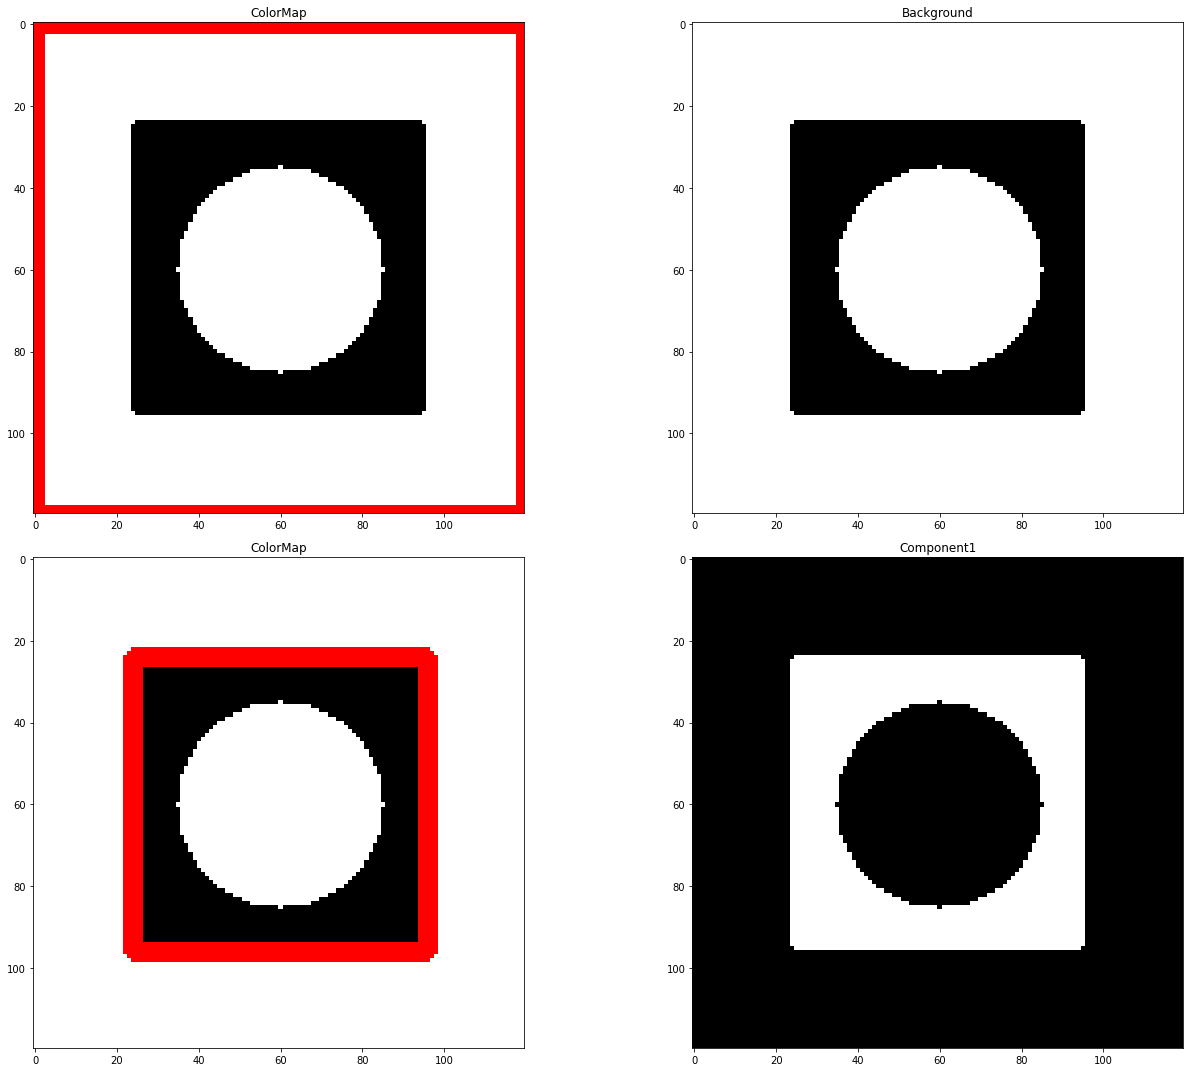

---- conveyor_f100 ---
Number of connected components = 5
--Background--
     left most coordinate = 0 | top most coordinate = 0 | horizontal size = 1920 | vertical size = 1080
     Area = 2059672
     Centroid Coordinates are = (957.3677522440466, 540.4425816343573)
--Component1--
     left most coordinate = 1454 | top most coordinate = 150 | horizontal size = 92 | vertical size = 100
     Area = 4630
     Centroid Coordinates are = (1499.2412526997841, 199.28444924406048)
--Component2--
     left most coordinate = 1259 | top most coordinate = 359 | horizontal size = 82 | vertical size = 82
     Area = 3079
     Centroid Coordinates are = (1299.1815524520948, 399.1815524520948)
--Component3--
     left most coordinate = 1459 | top most coordinate = 459 | horizontal size = 82 | vertical size = 82
     Area = 3079
     Centroid Coordinates are = (1499.1815524520948, 499.1815524520948)
--Component4--
     left most coordinate = 650 | top most coordinate = 550 | horizontal size = 101 | ve

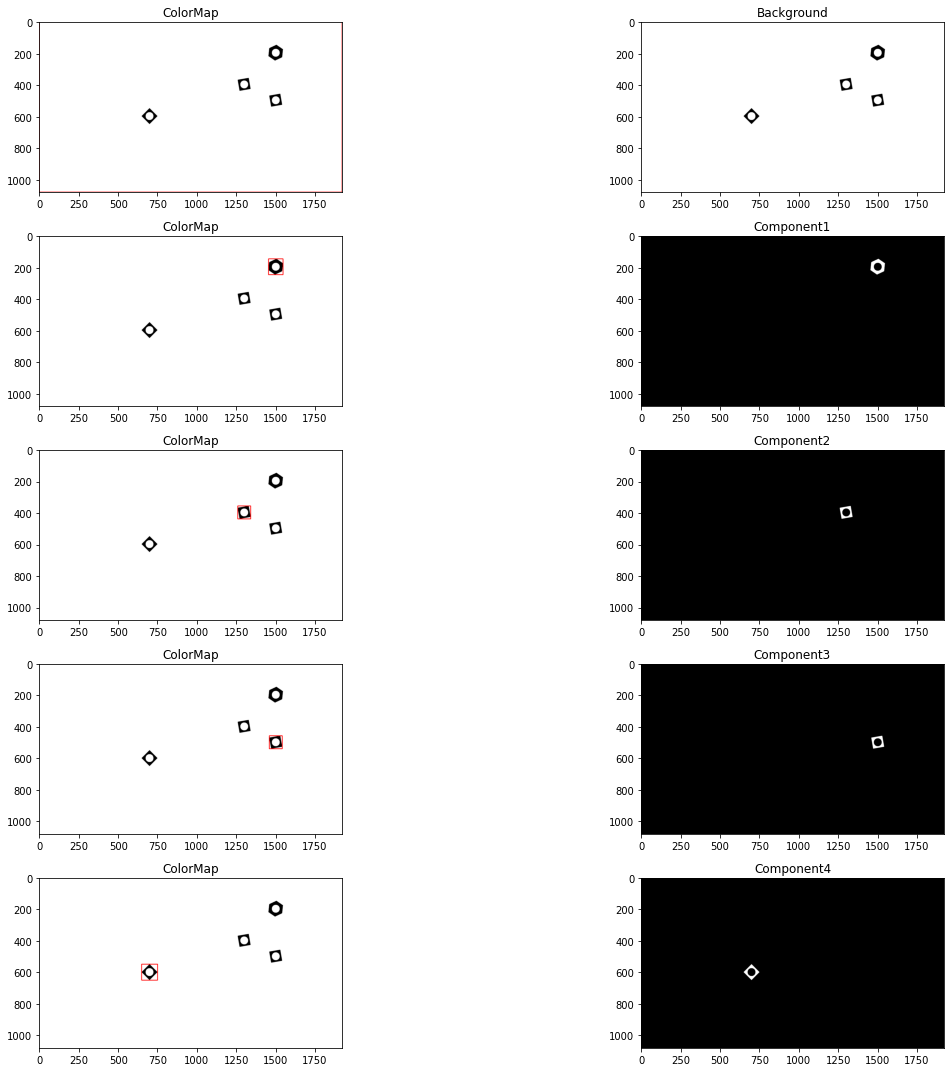

In [5]:
connectivity = 4
components = ["hexnut_template","squarenut_template","conveyor_f100"]
closed_images = [closing1,closing2,closing3]

for j in range(len(closed_images)):
    invert = cv.bitwise_not(closed_images[j])
    output = cv2.connectedComponentsWithStats(invert, connectivity, cv2.CV_32S)
    (numLabels, labels, stats, centroids) = output

    fig, ax = plt.subplots(numLabels,2,figsize= (20,15))
    print("----",components[j],"---")
    #Number of connected components
    print("Number of connected components =",numLabels)

    for i in range(numLabels):
        mask = np.zeros(closed_images[j].shape, dtype="uint8")
        #stats
        x = stats[i, cv2.CC_STAT_LEFT]
        y = stats[i, cv2.CC_STAT_TOP]
        w = stats[i, cv2.CC_STAT_WIDTH]
        h = stats[i, cv2.CC_STAT_HEIGHT]
        area = stats[i, cv2.CC_STAT_AREA]

        img = cv.cvtColor(closed_images[j] , cv.COLOR_GRAY2BGR)
        componentMask = (labels == i).astype("uint8") * 255
        mask = cv2.bitwise_or(mask, componentMask)
        cv.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 3)

        ax[i][0].imshow(img)
        ax[i][0].set_title("ColorMap")
        ax[i][1].imshow(mask,cmap='gray')
        if(i==0):
            print("--Background--")
            ax[i][1].set_title("Background")
        else:
            print("--Component{num}--".format(num=i))
            ax[i][1].set_title('Component{label}'.format(label=i))
        print("     left most coordinate =",x,"|","top most coordinate =",y,"|","horizontal size =",w,"|","vertical size =",h)
        print("     Area =",area)

        #centroid
        cx1,cy1 = centroids[i,0],centroids[i,1]
        print("     Centroid Coordinates are =",(cx1,cy1))
    fig.tight_layout()
    plt.show()




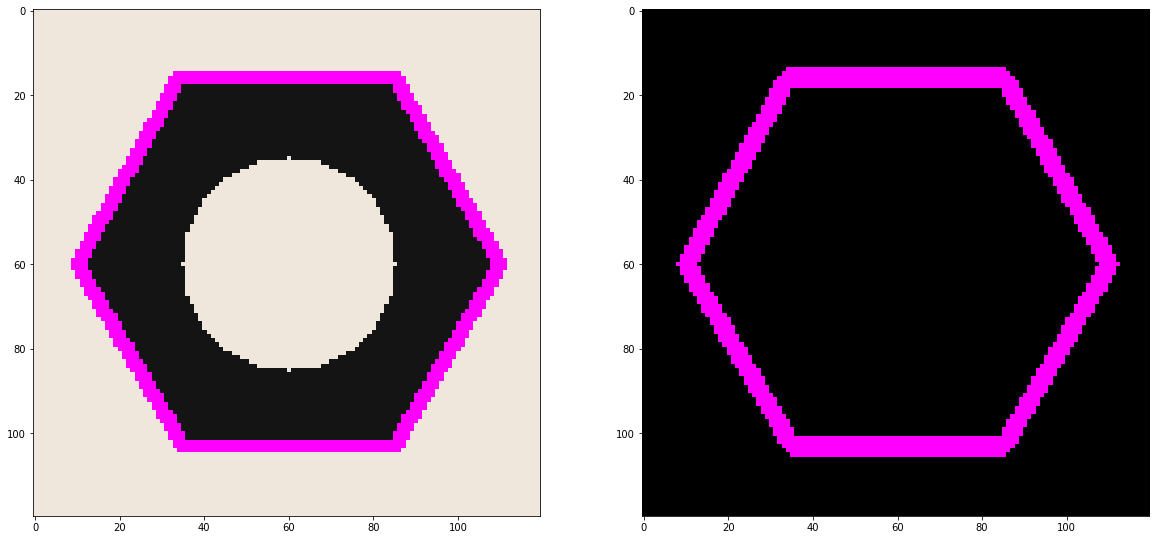

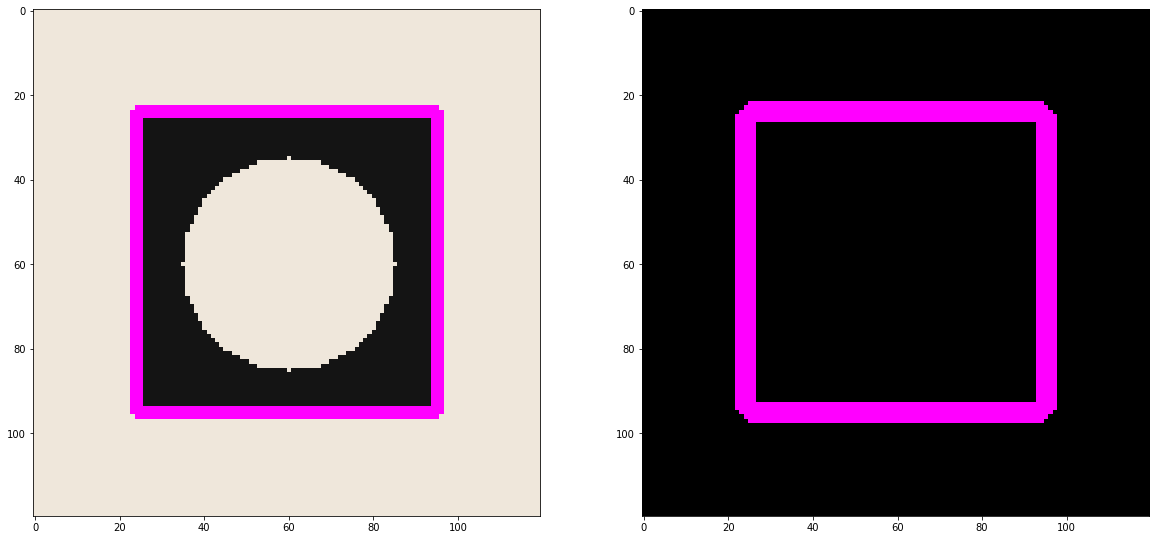

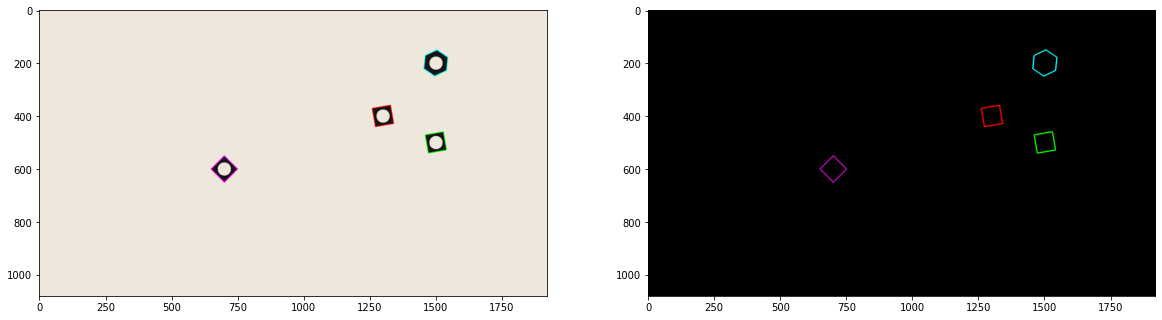

In [6]:
hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

images = [hexnut_template,squarenut_template,conveyor_f100]
colors = [(255,0,255), (0,255,0),(0,0,255),(255,255,0) ]

for j in range(len(images)):
    output = np.zeros(images[j].shape,dtype="uint8")
    contours, hierarchy = cv.findContours(cv.bitwise_not(closed_images[j]), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    for i in range(len(contours)):
        cnt = contours[i]
        cv.drawContours(images[j], [cnt], 0, colors[i%4], 2)
        cv.drawContours(output, [cnt], 0, colors[i%4], 3)

    fig, ax = plt.subplots(1,2,figsize= (20,15))
    ax[0].imshow(cv.cvtColor(images[j],cv.COLOR_BGR2RGB))
    ax[1].imshow(cv.cvtColor(output,cv.COLOR_BGR2RGB))
    plt.show()


In [8]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Number of matches = 1


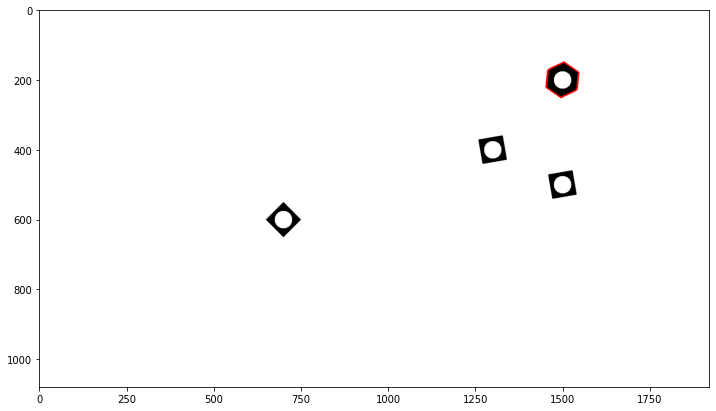

In [7]:
hex_nut = cv.bitwise_not(closing1)   
ret, thresh = cv.threshold(hex_nut, 127, 255,0)
contours,hierarchy = cv.findContours(thresh,2,1)
cnt = contours[0]

conveyor = closing3
ret1, thresh1 = cv.threshold(conveyor, 127, 255,0)
contours1,hierarchy1 = cv.findContours(thresh1,2,1)
cnt1 = contours1[0]

matches = 0
match_cnt = []
for i in contours1:
    ret = cv.matchShapes(i,cnt,1,0.0)
    if (ret<0.001):
        matches+=1
        match_cnt.append(i)

conveyor = cv.cvtColor(conveyor,cv.COLOR_GRAY2RGB)
for j in match_cnt:
    cv.drawContours(conveyor, [j], 0, [255,0,0], 3)

print("Number of matches =",matches)
plt.figure(figsize = (12,8))
plt.imshow(conveyor)
plt.show()



In [11]:
conveyor_f100 =  cv.imread('conveyor_f100.png',0)
conveyor_f101 =  cv.imread('conveyor_f101.png',0)

frames = [conveyor_f100,conveyor_f101]
kernel = np.array([[0,1,0],
                   [1,1,1],
                   [0,1,0]])
kernel = kernel.astype('uint8')

for i in frames:
    
    ret,th = cv.threshold(i,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
    closing = cv.morphologyEx(th, cv.MORPH_CLOSE, kernel)

    invert = cv.bitwise_not(closing)
    output = cv2.connectedComponentsWithStats(invert, connectivity, cv2.CV_32S)
    (numLabels, labels, stats, centroids) = output

    for i in range(numLabels):
        #stats
        area = stats[i, cv2.CC_STAT_AREA]
        cx1,cy1 = centroids[i,0],centroids[i,1]
        print("Area =",area,"| Centroid =",(cx1,cy1))
    print("----------")

    
    

Area = 2059672 | Centroid = (957.3677522440466, 540.4425816343573)
Area = 4630 | Centroid = (1499.2412526997841, 199.28444924406048)
Area = 3079 | Centroid = (1299.1815524520948, 399.1815524520948)
Area = 3079 | Centroid = (1499.1815524520948, 499.1815524520948)
Area = 3140 | Centroid = (700.0, 600.0)
----------
Area = 2059672 | Centroid = (957.4353746615966, 540.4425816343573)
Area = 4630 | Centroid = (1489.2412526997841, 199.28444924406048)
Area = 3079 | Centroid = (1289.1815524520948, 399.1815524520948)
Area = 3079 | Centroid = (1489.1815524520948, 499.1815524520948)
Area = 3140 | Centroid = (690.0, 600.0)
----------


Here we can observe that the area of full nuts are in the range (3000,4800)
Also after 1 frame the nuts have moved approximately 10 pixels in x direction

In [12]:
# Yor code here.
hex_nut = cv.bitwise_not(closing1)   
ret, thresh = cv.threshold(hex_nut, 127, 255,0)
contours,hierarchy = cv.findContours(thresh,2,1)
cnt = contours[0]

kernel = np.array([[0,1,0],
                   [1,1,1],
                   [0,1,0]])
kernel = kernel.astype('uint8')

# Writing the video

frame_array = []
shape = (1080, 1920, 3)

# Your code here
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

        


    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)
    frame_array.append(frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()


out = cv.VideoWriter('./conveyor_result_190172K.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
 
for i in range(len(frame_array)):
    cv.imshow('Frame', frame_array[i])
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_array[i])

out.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.
